In [1]:
import numpy as np
import matplotlib.pyplot as plt
import poppy
import astropy.units as u

# Lyot Coronagraph Simulation

In [2]:
def LyotCoronagraphField(plane='fpm',where='before'):
    wf = poppy.FresnelWavefront(2.4*u.m,wavelength=2.2*u.um)
    osys = poppy.FresnelOpticalSystem(pupil_diameter=2.4*u.m,beam_ratio=.5)
    osys.add_optic(poppy.CircularAperture(radius=1.2*u.m))
    osys.add_optic(poppy.QuadraticLens(7.9*2.4*u.m),distance=7.9*2.4*u.m)
    if plane == 'fpm':
        
        if where == 'before':
            
            osys.add_optic(poppy.ScalarTransmission(),distance=7.9*2.4*u.m)
            psf = osys.calc_psf(wavelength=2.2*u.um)
            
            return psf
        else:
            osys.add_optic(poppy.CircularOcculter(radius=5*1.22*2.2e-6/2.4*206265*u.arcsec),distance=7.9*2.4*u.m) 
            psf = osys.calc_psf(wavelength=2.2*u.um)
            return psf
    
    if plane == 'lyot':
        osys.add_optic(poppy.CircularOcculter(radius=5*1.22*2.2e-6/2.4*206265*u.arcsec),distance=7.9*2.4*u.m)
        osys.add_optic(poppy.QuadraticLens(7.9*2.4*u.m),distance=7.9*2.4*u.m)
        
        if where =='before':
            
            osys.add_optic(poppy.ScalarTransmission(),distance=7.9*2.4*u.m)
            psf = osys.propagate(wf)
            
            return psf
            
        else:
            
            osys.add_optic(poppy.CircularAperture(radius=0.9*1.2*u.m),distance=7.9*2.4*u.m)
            psf = osys.propagate(wf)
            
            return psf
        
    if plane == 'image':
        osys.add_optic(poppy.CircularOcculter(radius=5*1.22*2.2e-6/2.4*206265*u.arcsec),distance=7.9*2.4*u.m)
        osys.add_optic(poppy.QuadraticLens(7.9*2.4*u.m),distance=7.9*2.4*u.m)
        osys.add_optic(poppy.CircularAperture(radius=0.9*1.2*u.m),distance=7.9*2.4*u.m)
        osys.add_optic(poppy.QuadraticLens(7.9*2.4*u.m),distance=7.9*2.4*u.m)
        osys.add_optic(poppy.ScalarTransmission(),distance=7.9*2.4*u.m)
        psf = osys.calc_psf(wavelength=2.2*u.um)
        return psf
            
    
    return 

In [3]:
psf = LyotCoronagraphField(plane='image')

henlo


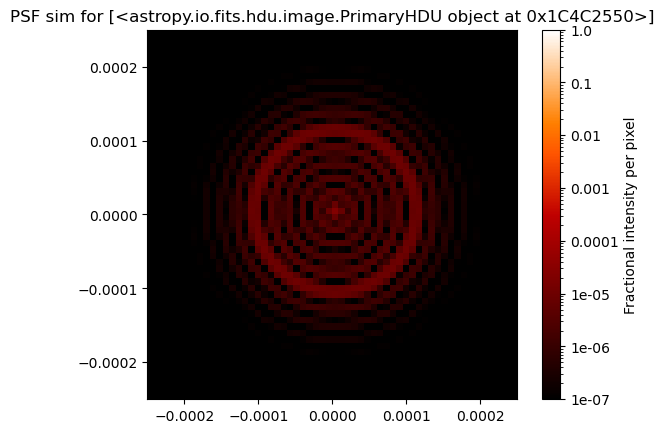

In [7]:
# FPM
plt.figure()
plt.title('image')
poppy.display_psf(psf,imagecrop=5e-4,vmax=1)
plt.show()

# Lyot
# plt.figure(figsize=[14,7])
# psf.display(what='both',imagecrop=3,vmax=0.3,colorbar=True)
# plt.show()

In [1]:
import webbpsf
import os
os.environ['WEBBPSF_PATH'] = 'webbpsf-data-0.9.0/webbpsf-data'

/home/uasal-optics/miniconda3/lib/python3.7/site-packages/pysynphot/locations.py:47: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/home/uasal-optics/miniconda3/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [50]:
cgi = webbpsf.CGI()
cgi.mode = "CHARSPC_F770"

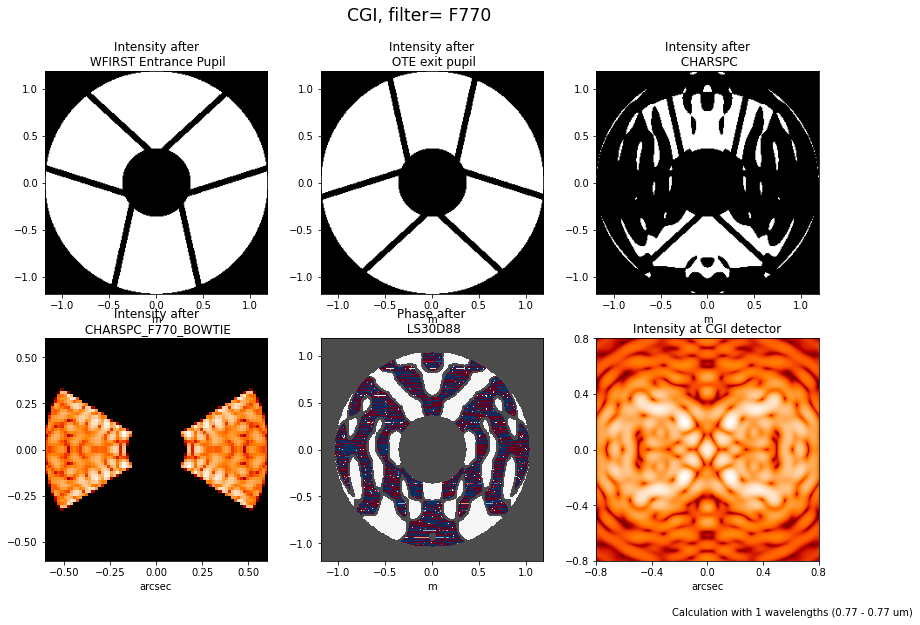

In [121]:
fig = plt.figure(figsize=[14,9])
fig.set_facecolor('white')
cgi.options['source_offset_r'] = 0
cgi.options['source_offset_theta'] = 90
psf = cgi.calc_psf(nlambda=1,fov_arcsec=1.6,display=True)

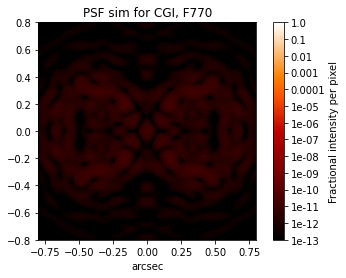

In [129]:
fig = plt.figure()
fig.set_facecolor('white')
webbpsf.display_psf(psf,vmin=1e-13,vmax=1)

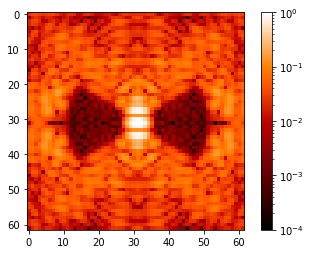

In [126]:
import numpy as np
from matplotlib.colors import LogNorm
from astropy.io import fits
pth = 'webbpsf-data-0.9.0/webbpsf-data/CGI/optics/CHARSPC_SP_256pix.fits.gz'
spcmask = fits.getdata(pth).astype(float)
fig = plt.figure()
fig.set_facecolor('white')
plt.set_cmap('gist_heat')
cut = 31
box = np.zeros([512,512])
box[256-128:256+128,256-128:256+128] = spcmask
spcmask = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(box)))[256-cut:256+cut,256-cut:256+cut]/1e4
plt.imshow(np.abs(spcmask),
           vmin = 1e-4,
           vmax = 1,
           norm=LogNorm())
plt.colorbar()
plt.show()

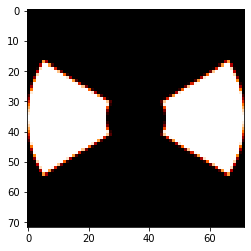

In [116]:
pth = 'webbpsf-data-0.9.0/webbpsf-data/CGI/optics/CHARSPC_FPM_25WA90_2x65deg_-_FP1res4_evensamp_D072_F890.fits.gz'
spcfpm = fits.getdata(pth).astype(float)
fig = plt.figure()
fig.set_facecolor('white')
plt.imshow(spcfpm,interpolation='none')
plt.show()

In [118]:
spcfpm.shape

(72, 72)